<a href="https://colab.research.google.com/github/PandayMoulina/BAIT/blob/main/Phishing_Website_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training

## 1. Importing all necessary libraries

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the Dataset
The dataset created in the Feature Extraction Notebook and stored in csv file is uploaded inthis notebook and stored in a dataframe.

In [2]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,http/https,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,dots,Label
0,NaN,0,0,0,0,2,0,0,0,0,0,0
1,NaN,0,0,0,0,3,0,0,0,0,0,0
2,lumeradiamonds.com,0,0,0,1,2,0,0,0,0,0,0
3,NaN,0,0,0,1,5,0,0,0,0,0,0
4,NaN,0,0,0,0,5,0,0,0,0,0,0


## 3. General insights into the data



In [3]:
#Checking the shape of the dataset
data0.shape

(10000, 12)

In [4]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'http/https', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'dots',
       'Label'],
      dtype='object')

In [5]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         5393 non-null   object
 1   http/https     10000 non-null  int64 
 2   Have_IP        10000 non-null  int64 
 3   Have_At        10000 non-null  int64 
 4   URL_Length     10000 non-null  int64 
 5   URL_Depth      10000 non-null  int64 
 6   Redirection    10000 non-null  int64 
 7   https_Domain   10000 non-null  int64 
 8   TinyURL        10000 non-null  int64 
 9   Prefix/Suffix  10000 non-null  int64 
 10  dots           10000 non-null  int64 
 11  Label          10000 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 937.6+ KB


## 4. Visualizing the data using plots and graphs

Done to find how the data is distributed and how the features are related to each other.

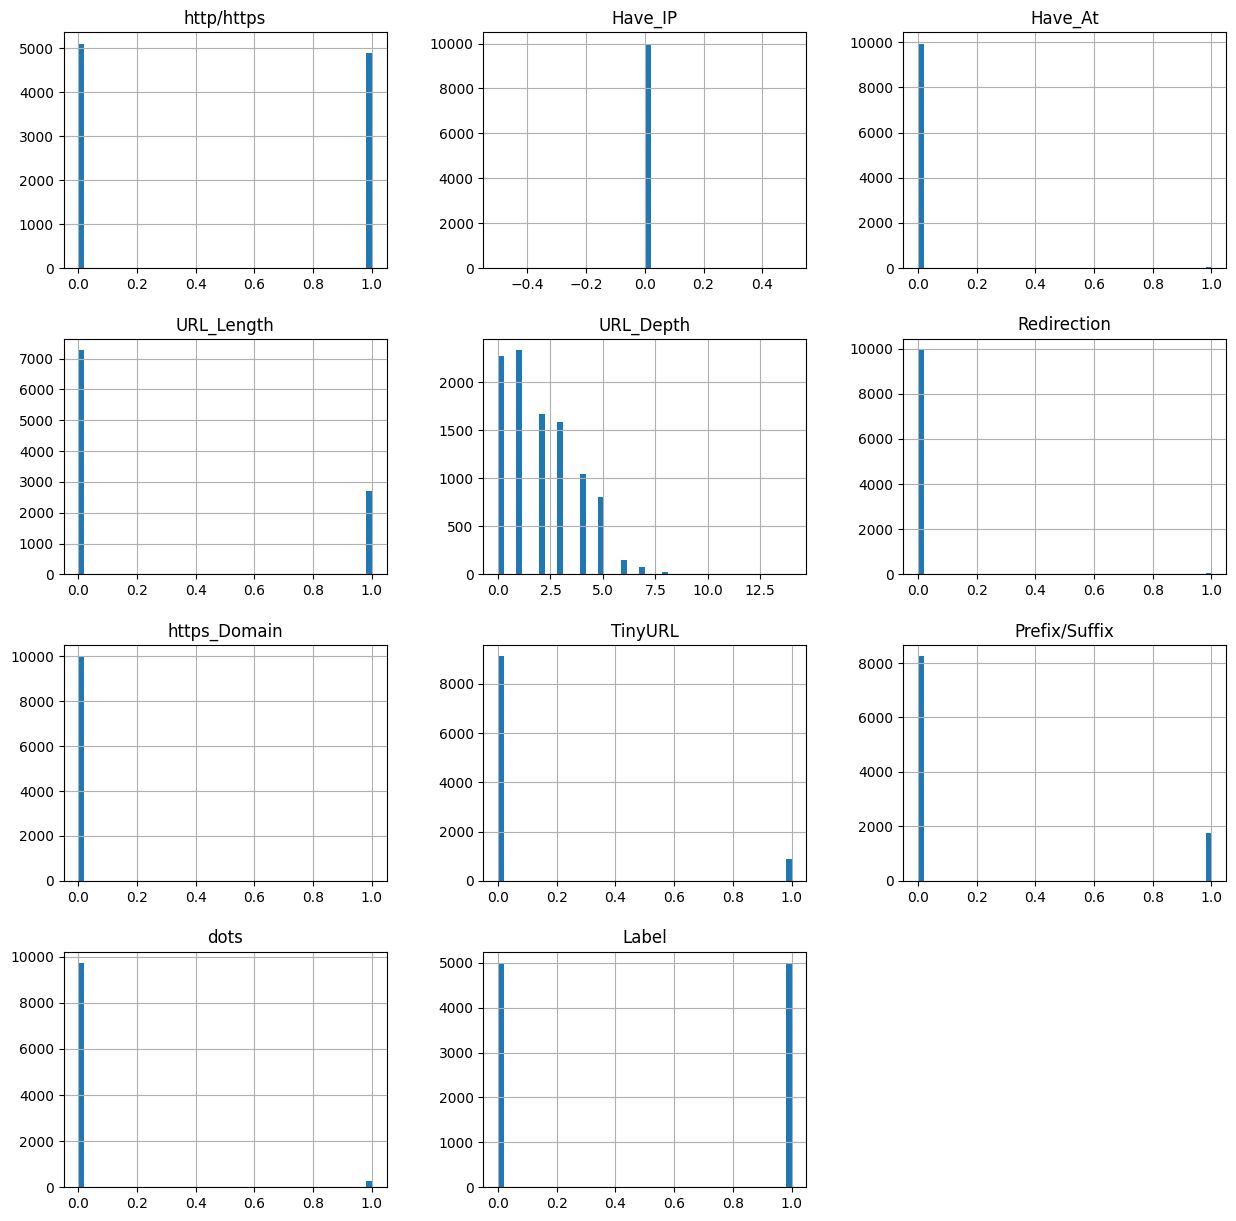

In [6]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

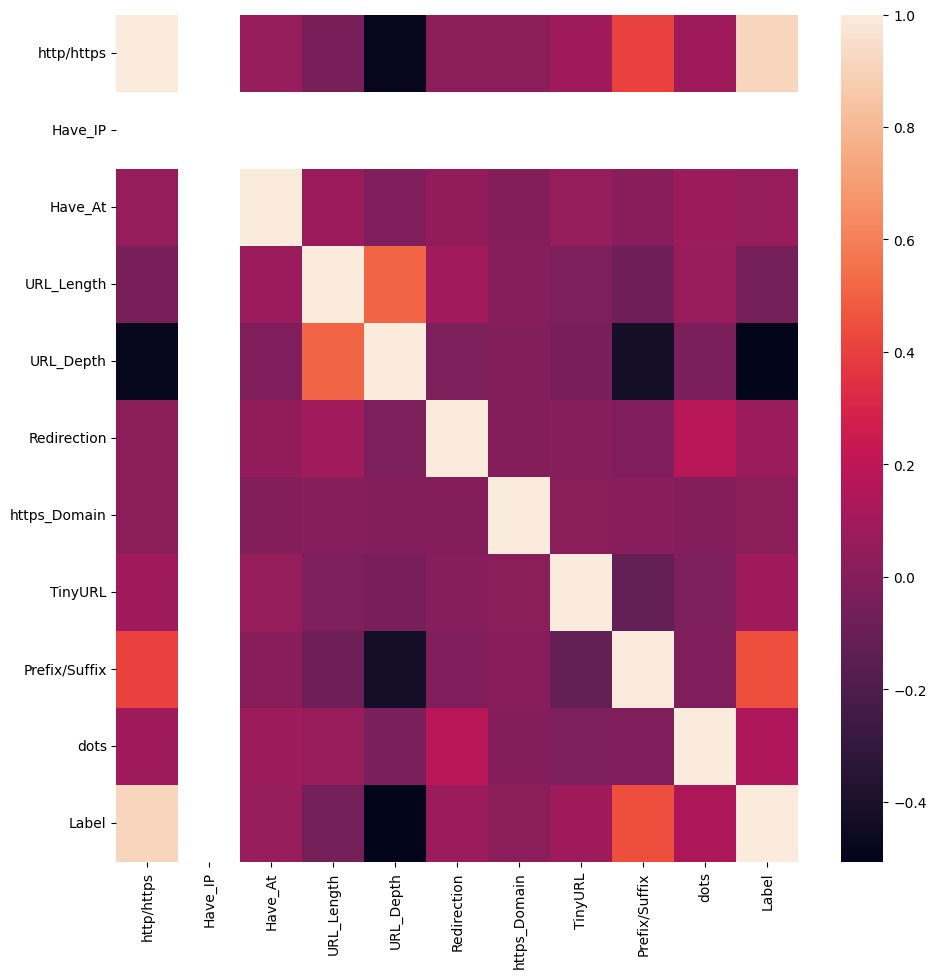

In [7]:
#Correlation heatmap
data00=data0.drop(["Domain"],axis=1)
plt.figure(figsize=(11,11))
sns.heatmap(data00.corr())
plt.show()

## 5. Data Preprocessing and EDA

In [8]:
data0.describe()

,http/https,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,dots,Label
count,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.489500,0.0,0.005500,0.272100,2.050800,0.0062,0.000300,0.089200,0.175700,0.02640,0.500000
std,0.499915,0.0,0.073961,0.445063,1.759184,0.0785,0.017319,0.285046,0.380584,0.16033,0.500025
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.0,0.000000,0.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.0,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.500000
75%,1.000000,0.0,0.000000,1.000000,3.000000,0.0000,0.000000,0.000000,0.000000,0.00000,1.000000
max,1.000000,0.0,1.000000,1.000000,14.000000,1.0000,1.000000,1.000000,1.000000,1.00000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

In [9]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 10 features & a target column.

In [10]:
#checking the data for null or missing values
data.isnull().sum()

,0
http/https,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
dots,0


In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it.Shuffling is important before splitting data into training and testing (or validation) sets to ensure that each set is representative of the whole dataset. This even evades the case of overfitting and bias while model training.

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,http/https,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,dots,Label
0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,2,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,3,0,0,0,0,0,0
4,0,0,0,1,4,0,0,0,0,0,0



From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## 6. Splitting the Data

In [12]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 10), (10000,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

## 7. Using ML models and training them

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Logistic Regression
* Naive Bayes
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines










In [60]:
#importing packages
from sklearn.metrics import accuracy_score

In [61]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

###7.1 Decision Tree Classifier

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [62]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [63]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [59]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.973
Decision Tree: Accuracy on test Data: 0.973
Decision Tree: f1 score : 0.973


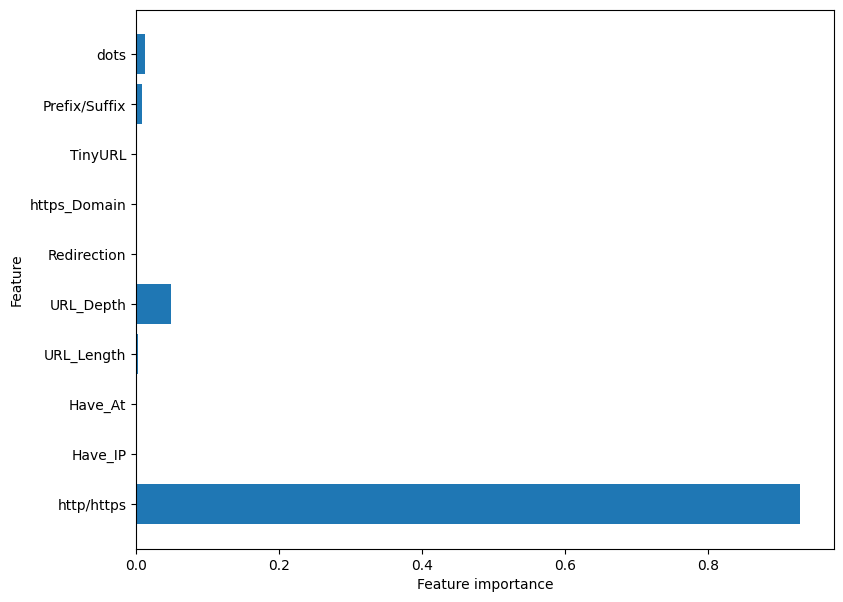

In [19]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

###7.2 Random Forest Classifier
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [23]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.973
Random forest: Accuracy on test Data: 0.974


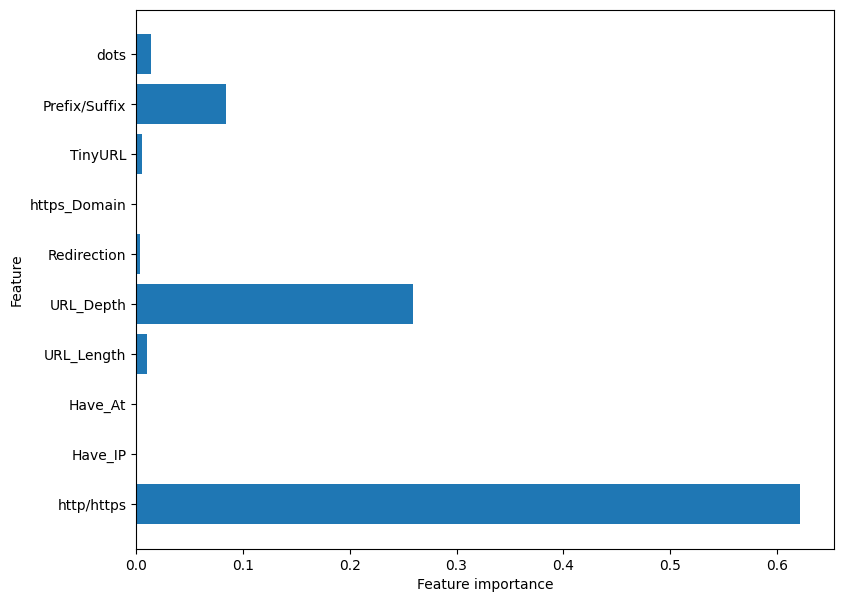

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

###7.3 Logistic Regression
Logistic regression is a widely used statistical method for binary classification problems, where the goal is to predict one of two possible outcomes. Unlike linear regression, which predicts a continuous value, logistic regression models the probability that a given input belongs to a particular class. It does this by using the logistic (sigmoid) function to output values between 0 and 1, which can be interpreted as probabilities. Logistic regression is simple, interpretable, and works well when the relationship between the features and the target variable is approximately linear. It also performs efficiently on smaller datasets and does not require feature scaling.

In [26]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logi = LogisticRegression()

# fit the model
logi.fit(X_train, y_train)

LogisticRegression()

In [27]:
#predicting the target value from the model for the samples
y_test_logi = logi.predict(X_test)
y_train_logi = logi.predict(X_train)

**Performance Evaluation:**

In [28]:
#computing the accuracy of the model performance
acc_train_logi = accuracy_score(y_train,y_train_logi)
acc_test_logi = accuracy_score(y_test,y_test_logi)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logi))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_logi))

Logistic Regression: Accuracy on training Data: 0.970
Logistic Regression: Accuracy on test Data: 0.967


In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Logistic Regression', acc_train_logi, acc_test_logi)

### 7.4 Multilayer Perceptron (MLPS) : Deep Learning
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [30]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [31]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation**

In [32]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.973
Multilayer Perceptrons: Accuracy on test Data: 0.974


In [33]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### 7.5 XGBoost Classifier
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [34]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation**

In [36]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.974
XGBoost : Accuracy on test Data: 0.973


In [37]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### 7.6 Autoencoder Neural Network
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [38]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [39]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 508 (1.98 KB)

 Trainable params: 508 (1.98 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1400 - loss: 1.3487 - val_accuracy: 0.3594 - val_loss: 0.7060
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5116 - loss: 0.0417 - val_accuracy: 0.6019 - val_loss: -1.2000
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6073 - loss: -1.2081 - val_accuracy: 0.6019 - val_loss: -1.4303
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6102 - loss: -1.4483 - val_accuracy: 0.6019 - val_loss: -1.4909
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6053 - loss: -1.4933 - val_accuracy: 0.6056 - val_loss: -1.5230
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6461 - loss: -1.6183 - val_accuracy: 0.8431 - val_loss: -1.6497
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8519 - loss: -1.6402 - val_accuracy: 0.8425 - val_loss: -1.6872
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8472 - loss: -1.6937 - val_

**Performance Evaluation**

In [41]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8436 - loss: -1.7451
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: -1.8105

Autoencoder: Accuracy on training Data: 0.847
Autoencoder: Accuracy on test Data: 0.848


In [42]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### 7.7 Support Vector Machine (SVM)
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [43]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [44]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation**

In [45]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.970
SVM : Accuracy on test Data: 0.967


In [46]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

#8. Comparison of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [47]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.973,0.973
1,Random Forest,0.973,0.974
2,Logistic Regression,0.970,0.967
3,Multilayer Perceptrons,0.973,0.974
4,XGBoost,0.974,0.973
5,AutoEncoder,0.847,0.848
6,SVM,0.970,0.967


In [51]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,0.973,0.974
3,Multilayer Perceptrons,0.973,0.974
4,XGBoost,0.974,0.973
0,Decision Tree,0.973,0.973
2,Logistic Regression,0.970,0.967
6,SVM,0.970,0.967
5,AutoEncoder,0.847,0.848


For the above comparison, it is clear that the Random Forest Classifier works well with this Test dataset giving an accuracy of 97.4%.
